In [345]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [346]:
df = pd.read_csv('./TF_2_Notebooks_and_Data/DATA/fake_reg.csv')

In [347]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


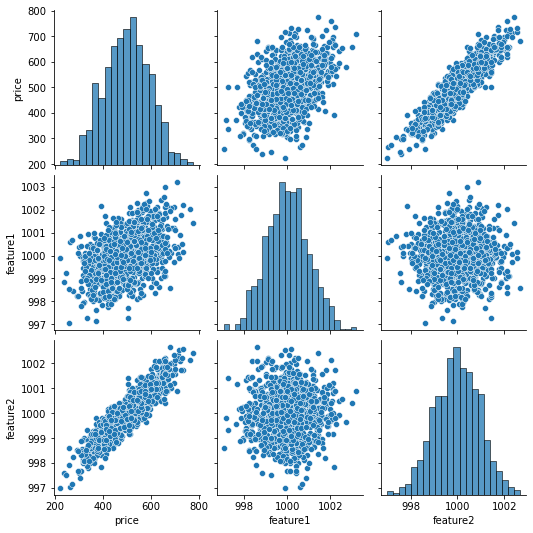

In [348]:
sns.pairplot(df)

In [349]:
from sklearn.model_selection import train_test_split

In [350]:
X = df[['feature1', 'feature2']].values
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [351]:
y = df['price'].values
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [352]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [353]:
X_train.shape

(700, 2)

In [354]:
X_test.shape

(300, 2)

In [355]:
y_train.shape

(700,)

In [356]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [357]:
from sklearn.preprocessing import MinMaxScaler

In [358]:
scaler = MinMaxScaler()

In [359]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [360]:
scaler.fit(X_train)

MinMaxScaler()

In [361]:
X_train = scaler.transform(X_train)
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [362]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.39533339,  0.38540671],
       [ 0.57300502,  0.74070924],
       [ 0.61294076,  0.65734264],
       [ 0.38169528,  0.73076311],
       [ 0.07776591,  0.46323644],
       [ 0.49421971,  0.68949258],
       [ 0.2065742 ,  0.70096247],
       [ 0.55141988,  0.41776773],
       [ 0.36812191,  0.69082394],
       [ 0.56465724,  0.3877465 ],
       [ 0.57048029,  0.71810824],
       [ 0.79569525,  0.47979901],
       [ 0.38488235,  0.41856516],
       [ 0.33142545,  0.42411972],
       [ 0.89361377,  0.63912775],
       [ 0.50191166,  0.39789174],
       [ 0.7159808 ,  0.43688384],
       [ 0.35812192,  0.92028225],
       [ 0.49989367,  0.85589311],
       [ 0.63965434,  0.59024789],
       [ 0.19053626,  0.34203634],
       [ 0.40982896,  0.45849208],
       [ 0.26844791,  0.40167269],
       [ 0.38649709,  0.33592759],
       [ 0.50654703,  0.65789843],
       [ 0.41260556,  0.79338075],
       [ 0.45631316,  0.61323307],
       [ 0.44064792,  0.40889315],
       [ 0.42963904,

In [363]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [364]:
# model = Sequential([Dense(4, activation='relu'),
#                     Dense(2, activation='relu'),
#                     Dense(1)])
# model

In [365]:
# Another alternative syntax for a better organization
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

model

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [366]:
# 1 epochs = go through dataset 1 time
model.fit(X_train,y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 838us/step - loss: 251621.3641
Epoch 2/250
22/22 [==============================] - 0s 869us/step - loss: 260211.1576
Epoch 3/250
22/22 [==============================] - 0s 866us/step - loss: 260805.9973
Epoch 4/250
22/22 [==============================] - 0s 928us/step - loss: 252162.9463
Epoch 5/250
22/22 [==============================] - 0s 970us/step - loss: 257034.0686
Epoch 6/250
22/22 [==============================] - 0s 893us/step - loss: 258182.6298
Epoch 7/250
22/22 [==============================] - 0s 882us/step - loss: 260587.3784
Epoch 8/250
22/22 [==============================] - 0s 924us/step - loss: 262218.4742
Epoch 9/250
22/22 [==============================] - 0s 802us/step - loss: 264055.4606
Epoch 10/250
22/22 [==============================] - 0s 874us/step - loss: 250979.3668
Epoch 11/250
22/22 [==============================] - 0s 966us/step - loss: 253709.1603
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 830us/step - loss: 59388.1867
Epoch 95/250
22/22 [==============================] - 0s 838us/step - loss: 52722.0277
Epoch 96/250
22/22 [==============================] - 0s 802us/step - loss: 51671.0387
Epoch 97/250
22/22 [==============================] - 0s 876us/step - loss: 45841.2157
Epoch 98/250
22/22 [==============================] - 0s 804us/step - loss: 40722.6021
Epoch 99/250
22/22 [==============================] - 0s 818us/step - loss: 36950.0459
Epoch 100/250
22/22 [==============================] - 0s 809us/step - loss: 33900.9348
Epoch 101/250
22/22 [==============================] - 0s 823us/step - loss: 29201.2128
Epoch 102/250
22/22 [==============================] - 0s 870us/step - loss: 25999.4118
Epoch 103/250
22/22 [==============================] - 0s 807us/step - loss: 22429.6660
Epoch 104/250
22/22 [==============================] - 0s 817us/step - loss: 18996.4896
Epoch 105/250
22/22 [==============================

22/22 [==============================] - 0s 824us/step - loss: 474.0823
Epoch 189/250
22/22 [==============================] - 0s 879us/step - loss: 454.1384
Epoch 190/250
22/22 [==============================] - 0s 802us/step - loss: 455.0785
Epoch 191/250
22/22 [==============================] - 0s 903us/step - loss: 462.3020
Epoch 192/250
22/22 [==============================] - 0s 833us/step - loss: 418.1215
Epoch 193/250
22/22 [==============================] - 0s 841us/step - loss: 440.9530
Epoch 194/250
22/22 [==============================] - 0s 830us/step - loss: 405.3329
Epoch 195/250
22/22 [==============================] - 0s 822us/step - loss: 360.2398
Epoch 196/250
22/22 [==============================] - 0s 831us/step - loss: 368.5828
Epoch 197/250
22/22 [==============================] - 0s 853us/step - loss: 381.8792
Epoch 198/250
22/22 [==============================] - 0s 856us/step - loss: 346.7974
Epoch 199/250
22/22 [==============================] - 0s 808us/step

In [367]:
model.history.history

{'loss': [256802.484375,
  256674.78125,
  256575.125,
  256490.015625,
  256401.546875,
  256304.015625,
  256194.515625,
  256068.984375,
  255925.640625,
  255765.234375,
  255590.703125,
  255399.21875,
  255190.703125,
  254964.0625,
  254717.578125,
  254452.203125,
  254167.296875,
  253860.3125,
  253532.828125,
  253183.953125,
  252809.484375,
  252409.546875,
  251987.421875,
  251534.421875,
  251045.09375,
  250518.40625,
  249956.234375,
  249353.046875,
  248709.890625,
  248019.609375,
  247285.25,
  246505.34375,
  245679.421875,
  244800.046875,
  243868.359375,
  242889.390625,
  241848.3125,
  240749.9375,
  239588.75,
  238363.9375,
  237084.0,
  235735.21875,
  234320.796875,
  232828.78125,
  231272.75,
  229644.640625,
  227944.796875,
  226162.71875,
  224304.234375,
  222367.953125,
  220346.671875,
  218250.375,
  216063.40625,
  213790.359375,
  211425.515625,
  208990.1875,
  206449.28125,
  203811.9375,
  201106.0625,
  198298.953125,
  195397.84375,
  192

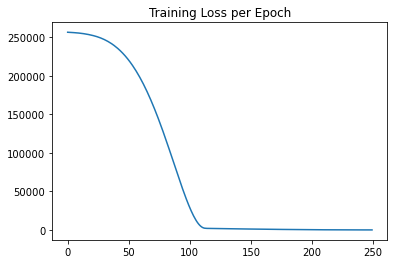

In [368]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [369]:
model.metrics_names

['loss']

In [370]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [371]:
training_score

26.898527145385742

In [372]:
test_score

28.13294219970703

In [373]:
test_predictions = model.predict(X_test)
test_predictions

array([[407.4789 ],
       [622.0857 ],
       [590.91516],
       [572.2841 ],
       [370.705  ],
       [578.65295],
       [516.6285 ],
       [459.9066 ],
       [549.66425],
       [448.41287],
       [610.4973 ],
       [547.4952 ],
       [421.15372],
       [411.29208],
       [648.0196 ],
       [438.6014 ],
       [507.88254],
       [658.94196],
       [660.93774],
       [564.553  ],
       [338.24704],
       [446.4407 ],
       [385.57053],
       [381.33133],
       [566.1801 ],
       [610.0115 ],
       [532.64484],
       [429.55484],
       [654.2002 ],
       [415.63312],
       [443.71948],
       [485.98007],
       [439.95712],
       [679.9904 ],
       [425.8043 ],
       [420.1988 ],
       [501.16476],
       [550.1383 ],
       [511.14566],
       [398.90317],
       [616.9448 ],
       [418.2629 ],
       [603.0854 ],
       [446.58316],
       [502.5881 ],
       [579.5967 ],
       [665.7819 ],
       [490.68365],
       [321.6474 ],
       [486.39883],


In [376]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [378]:
test_predictions = pd.Series(test_predictions.reshape(300,))
test_predictions

0      407.478912
1      622.085693
2      590.915161
3      572.284119
4      370.704987
          ...    
295    529.727844
296    517.730408
297    608.287415
298    418.360229
299    413.451813
Length: 300, dtype: float32

In [379]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df

,Test Y,0
0,402.296319,407.478912
1,624.156198,622.085693
2,582.455066,590.915161
3,578.588606,572.284119
4,371.224104,370.704987
...,...,...
295,525.704657,529.727844
296,502.909473,517.730408
297,612.727910,608.287415
298,417.569725,418.360229


In [380]:
pred_df.columns = ['Test Y','Model Predictions']
pred_df

,Test Y,Model Predictions
0,402.296319,407.478912
1,624.156198,622.085693
2,582.455066,590.915161
3,578.588606,572.284119
4,371.224104,370.704987
...,...,...
295,525.704657,529.727844
296,502.909473,517.730408
297,612.727910,608.287415
298,417.569725,418.360229


<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

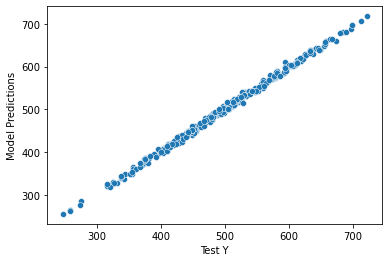

In [381]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [383]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']
pred_df

,Test Y,Model Predictions,Error
0,402.296319,407.478912,-5.182594
1,624.156198,622.085693,2.070505
2,582.455066,590.915161,-8.460095
3,578.588606,572.284119,6.304488
4,371.224104,370.704987,0.519117
...,...,...,...
295,525.704657,529.727844,-4.023188
296,502.909473,517.730408,-14.820934
297,612.727910,608.287415,4.440496
298,417.569725,418.360229,-0.790505


/Users/varis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error', ylabel='Density'>

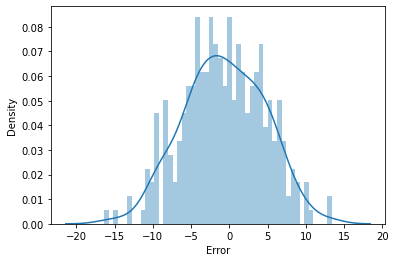

In [384]:
sns.distplot(pred_df['Error'],bins=50)

In [385]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [386]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.319889976699443

In [387]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

28.132948132879143

In [388]:
# Essentially the same thing, difference just due to precision
test_score

28.13294219970703

In [389]:
#RMSE
test_score**0.5

5.304049603812829

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [390]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [391]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [392]:
new_gem = scaler.transform(new_gem)

In [393]:
model.predict(new_gem)

array([[422.80063]], dtype=float32)

## Saving and Loading a Model

In [394]:
from tensorflow.keras.models import load_model

In [395]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [396]:
later_model = load_model('my_model.h5')

In [397]:
later_model.predict(new_gem)

array([[422.80063]], dtype=float32)